## Neural Network from scratch
#### XOR operation using a Feed Forward Neural Network(Single Hidden Layer) with backpropagation

In [188]:
# Import required libraries
import numpy as np
import math
from matplotlib import pyplot as plt

In [297]:
# Input dataset for XOR operation
X = np.array([ [1, 1, 1], [1, 0, 1], [0, 1, 1],[0, 0, 1] ]) # 1 for bias

# Output class
Y = np.array([[0],[1],[1],[0]])

# single hidden layer, number of nodes
hidden_layer_nodes = 3

# Learning rate
#alpha = 0.6 # logistic
alpha=0.01 #- for tanh and related
#alpha=0.9 # relu

# Epoch
epoch = 10000

# Convergence
covergence_threshold = 0.001

# weights
# here weights are initialized by normal distribution
w01 = np.random.normal(0, 1, len(X[0])*hidden_layer_nodes).reshape(len(X[0]),hidden_layer_nodes) # zero mean, unit variance
w12 = np.random.normal(0, 1, hidden_layer_nodes*1).reshape(hidden_layer_nodes,1) # one output node

In [232]:
def golden_ratio(i):
    ratio = (1 + math.sqrt(5)) / 2
    return int(ratio ** i / math.sqrt(5) + 0.5)

In [296]:
PI = float(format(np.pi, '.20f'))

In [278]:
# Define Activation Functions

##########
# tanh
##########
def tanh(x):
    return np.tanh(x)
def tanh_derivative(x):
    return (1.0 - np.tanh(x)**2)

##########
# pi-tanh
##########
def pitanh(x):
    return np.tanh(x)
def pitanh_derivative(x):
    return PI*(1.0 - np.tanh(x)**2)

####################
# gr-tanh
####################
def grtanh(x):
    return np.tanh(x)
def grtanh_derivative(x,i):
    return golden_ratio(i)*(1.0 - np.tanh(x)**2)

##########
# sigmoid
##########
def logistic(x):
    return 1/(1 + np.exp(-x))
def logistic_derivative(x):
    return logistic(x)*(1-logistic(x))

##########
# relu
##########
def relu(x):
    return x * (x > 0)
def relu_derivative(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

##########
# leaky relu
##########
def lrelu(x):
    return x * (x > 0)
def lrelu_derivative(x):
    x[x<=0] = 0.01
    x[x>0] = 1
    return x

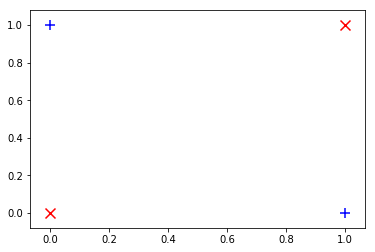

In [4]:
# plot the data
for index, row in enumerate(X):
    if index == 0 or index == 3:
        plt.scatter(row[0], row[1], marker='x', s=100, color='red')
    else:
        plt.scatter(row[0], row[1],marker='+', s=100, color='blue')

##### Training the NN and plotting the loss across epoch

In [298]:
cost_error_array = []
for i in range(1,epoch):
    # Forward Pass
    # from input to hidden
    z_h = np.dot(X, w01)
    a_h = pitanh(z_h)

    # from hidden to output
    z_o = np.dot(a_h, w12)
    a_o = pitanh(z_o)

    # print intermediate results
    print("Prediction in epoch: " + str(i))
    print(a_o)
    # Calculating the error
    a_o_error = (1/2)*np.sum((np.power((a_o - Y), 2)))
    print("Error in epoch: " + str(i))
    print(a_o_error)
    cost_error_array.append(a_o_error)
#    if a_o_error <= covergence_threshold:
#        print("Reached convergence...exiting.")
#        break
    
    # Backpropagation
    delta_a_o_error = a_o - Y
    #delta_z_o = grtanh_derivative(a_o,(epoch-i)%10)
    delta_z_o = pitanh_derivative(a_o)
    delta_w12 = a_h
    delta_output_layer = np.dot(delta_w12.T,(delta_a_o_error * delta_z_o))
    
    delta_a_h = np.dot(delta_a_o_error * delta_z_o, w12.T)
    #delta_z_h = grtanh_derivative(a_h,(epoch-i)%10)
    delta_z_h = pitanh_derivative(a_h)
    delta_w01 = X
    delta_hidden_layer = np.dot(delta_w01.T, delta_a_h * delta_z_h)
    
    #Update the weights
    w01 = w01 - alpha*delta_hidden_layer
    w12 = w12 - alpha*delta_output_layer

Prediction in epoch: 1
[[0.98708366]
 [0.40516767]
 [0.99004603]
 [0.36351415]]
Error in epoch: 1
0.7302006410375054
Prediction in epoch: 2
[[0.97941965]
 [0.3591433 ]
 [0.98257048]
 [0.2587896 ]]
Error in epoch: 2
0.7186180043395382
Prediction in epoch: 3
[[0.96934761]
 [0.36535031]
 [0.97084129]
 [0.20382553]]
Error in epoch: 3
0.6924050492773737
Prediction in epoch: 4
[[0.95308118]
 [0.36982013]
 [0.95129338]
 [0.16263735]]
Error in epoch: 4
0.6671568228457817
Prediction in epoch: 5
[[0.92775972]
 [0.37426993]
 [0.92049365]
 [0.13463165]]
Error in epoch: 5
0.6383615812033521
Prediction in epoch: 6
[[0.89141021]
 [0.38111267]
 [0.87642108]
 [0.11958835]]
Error in epoch: 6
0.6036034072192061
Prediction in epoch: 7
[[0.8451168 ]
 [0.39232028]
 [0.82117474]
 [0.11737526]]
Error in epoch: 7
0.5646262351771594
Prediction in epoch: 8
[[0.79379416]
 [0.4083225 ]
 [0.76163574]
 [0.12712719]]
Error in epoch: 8
0.5265851358295002
Prediction in epoch: 9
[[0.74377741]
 [0.42763605]
 [0.70607247]

Prediction in epoch: 389
[[0.071059  ]
 [0.89543522]
 [0.86334707]
 [0.04468476]]
Error in epoch: 389
0.018326962983792737
Prediction in epoch: 390
[[0.07078292]
 [0.89577452]
 [0.86376913]
 [0.04450699]]
Error in epoch: 390
0.018206447792903455
Prediction in epoch: 391
[[0.0705086 ]
 [0.89611201]
 [0.86418907]
 [0.04433035]]
Error in epoch: 391
0.018086982698825766
Prediction in epoch: 392
[[0.07023601]
 [0.89644768]
 [0.86460692]
 [0.04415482]]
Error in epoch: 392
0.01796855667924439
Prediction in epoch: 393
[[0.06996514]
 [0.89678156]
 [0.86502268]
 [0.04398039]]
Error in epoch: 393
0.01785115884376012
Prediction in epoch: 394
[[0.06969598]
 [0.89711366]
 [0.86543637]
 [0.04380706]]
Error in epoch: 394
0.01773477843216126
Prediction in epoch: 395
[[0.06942852]
 [0.89744399]
 [0.86584801]
 [0.04363483]]
Error in epoch: 395
0.017619404812718373
Prediction in epoch: 396
[[0.06916273]
 [0.89777256]
 [0.86625759]
 [0.04346367]]
Error in epoch: 396
0.017505027480503164
Prediction in epoch

Prediction in epoch: 590
[[0.03794405]
 [0.93887107]
 [0.91871145]
 [0.02341532]]
Error in epoch: 590
0.006166301413594483
Prediction in epoch: 591
[[0.03784919]
 [0.93900476]
 [0.91888621]
 [0.02335479]]
Error in epoch: 591
0.006138936483521075
Prediction in epoch: 592
[[0.03775473]
 [0.93913793]
 [0.91906031]
 [0.02329454]]
Error in epoch: 592
0.006111740462487051
Prediction in epoch: 593
[[0.0376607 ]
 [0.93927057]
 [0.91923374]
 [0.02323455]]
Error in epoch: 593
0.006084712042400604
Prediction in epoch: 594
[[0.03756708]
 [0.9394027 ]
 [0.91940652]
 [0.02317483]]
Error in epoch: 594
0.006057849927183883
Prediction in epoch: 595
[[0.03747387]
 [0.9395343 ]
 [0.91957865]
 [0.02311537]]
Error in epoch: 595
0.006031152832646591
Prediction in epoch: 596
[[0.03738107]
 [0.93966539]
 [0.91975013]
 [0.02305618]]
Error in epoch: 596
0.006004619486361497
Prediction in epoch: 597
[[0.03728867]
 [0.93979596]
 [0.91992096]
 [0.02299725]]
Error in epoch: 597
0.005978248627540783
Prediction in ep

Prediction in epoch: 811
[[0.02398001]
 [0.95930086]
 [0.94571586]
 [0.01455997]]
Error in epoch: 811
0.0026951111156925814
Prediction in epoch: 812
[[0.02393858]
 [0.95936399]
 [0.94580017]
 [0.01453389]]
Error in epoch: 812
0.002686598302194661
Prediction in epoch: 813
[[0.02389728]
 [0.95942693]
 [0.94588425]
 [0.01450791]]
Error in epoch: 813
0.002678123857792156
Prediction in epoch: 814
[[0.02385611]
 [0.9594897 ]
 [0.94596808]
 [0.014482  ]]
Error in epoch: 814
0.002669687561022285
Prediction in epoch: 815
[[0.02381507]
 [0.95955228]
 [0.94605168]
 [0.01445618]]
Error in epoch: 815
0.002661289191966198
Prediction in epoch: 816
[[0.02377416]
 [0.95961468]
 [0.94613503]
 [0.01443044]]
Error in epoch: 816
0.0026529285322360384
Prediction in epoch: 817
[[0.02373338]
 [0.9596769 ]
 [0.94621815]
 [0.01440479]]
Error in epoch: 817
0.0026446053649629366
Prediction in epoch: 818
[[0.02369273]
 [0.95973894]
 [0.94630104]
 [0.01437922]]
Error in epoch: 818
0.0026363194747844347
Prediction i

Prediction in epoch: 1141
[[0.01507333]
 [0.97329876]
 [0.96450472]
 [0.00899631]]
Error in epoch: 1141
0.0011405050582641765
Prediction in epoch: 1142
[[0.01505594]
 [0.97332701]
 [0.96454278]
 [0.00898554]]
Error in epoch: 1142
0.001138042089140152
Prediction in epoch: 1143
[[0.0150386 ]
 [0.97335521]
 [0.96458076]
 [0.00897481]]
Error in epoch: 1143
0.0011355868548924542
Prediction in epoch: 1144
[[0.01502129]
 [0.97338335]
 [0.96461867]
 [0.00896409]]
Error in epoch: 1144
0.0011331393239549042
Prediction in epoch: 1145
[[0.01500402]
 [0.97341144]
 [0.9646565 ]
 [0.0089534 ]]
Error in epoch: 1145
0.001130699464918842
Prediction in epoch: 1146
[[0.01498679]
 [0.97343946]
 [0.96469425]
 [0.00894274]]
Error in epoch: 1146
0.0011282672465322103
Prediction in epoch: 1147
[[0.01496959]
 [0.97346743]
 [0.96473193]
 [0.00893209]]
Error in epoch: 1147
0.0011258426376986486
Prediction in epoch: 1148
[[0.01495243]
 [0.97349534]
 [0.96476953]
 [0.00892147]]
Error in epoch: 1148
0.00112342560747

Prediction in epoch: 1334
[[0.01230424]
 [0.97785359]
 [0.97064185]
 [0.0072882 ]]
Error in epoch: 1334
0.0007784383534178763
Prediction in epoch: 1335
[[0.01229243]
 [0.97787325]
 [0.97066833]
 [0.00728095]]
Error in epoch: 1335
0.0007770279800859625
Prediction in epoch: 1336
[[0.01228065]
 [0.97789287]
 [0.97069477]
 [0.00727371]]
Error in epoch: 1336
0.0007756213468227996
Prediction in epoch: 1337
[[0.01226889]
 [0.97791247]
 [0.97072117]
 [0.00726648]]
Error in epoch: 1337
0.0007742184406762734
Prediction in epoch: 1338
[[0.01225716]
 [0.97793202]
 [0.97074751]
 [0.00725927]]
Error in epoch: 1338
0.0007728192487492944
Prediction in epoch: 1339
[[0.01224544]
 [0.97795154]
 [0.97077382]
 [0.00725208]]
Error in epoch: 1339
0.0007714237581996602
Prediction in epoch: 1340
[[0.01223374]
 [0.97797103]
 [0.97080008]
 [0.00724489]]
Error in epoch: 1340
0.0007700319562395795
Prediction in epoch: 1341
[[0.01222207]
 [0.97799049]
 [0.97082629]
 [0.00723772]]
Error in epoch: 1341
0.000768643830

 [0.00596123]]
Error in epoch: 1555
0.0005390482527043389
Prediction in epoch: 1556
[[0.01012867]
 [0.98151532]
 [0.97557253]
 [0.00595627]]
Error in epoch: 1556
0.0005382259736570325
Prediction in epoch: 1557
[[0.01012056]
 [0.98152913]
 [0.97559111]
 [0.00595132]]
Error in epoch: 1557
0.0005374055402019663
Prediction in epoch: 1558
[[0.01011245]
 [0.98154292]
 [0.97560966]
 [0.00594638]]
Error in epoch: 1558
0.000536586946907616
Prediction in epoch: 1559
[[0.01010437]
 [0.98155668]
 [0.97562818]
 [0.00594145]]
Error in epoch: 1559
0.0005357701883622088
Prediction in epoch: 1560
[[0.01009629]
 [0.98157043]
 [0.97564668]
 [0.00593652]]
Error in epoch: 1560
0.0005349552591735473
Prediction in epoch: 1561
[[0.01008822]
 [0.98158416]
 [0.97566515]
 [0.0059316 ]]
Error in epoch: 1561
0.0005341421539689461
Prediction in epoch: 1562
[[0.01008017]
 [0.98159787]
 [0.97568359]
 [0.00592669]]
Error in epoch: 1562
0.0005333308673951852
Prediction in epoch: 1563
[[0.01007213]
 [0.98161156]
 [0.975

[[0.00843488]
 [0.98442392]
 [0.97948127]
 [0.00492683]]
Error in epoch: 1805
0.0003795266867367001
Prediction in epoch: 1806
[[0.00842919]
 [0.98443378]
 [0.97949451]
 [0.00492338]]
Error in epoch: 1806
0.00037903664066342636
Prediction in epoch: 1807
[[0.00842351]
 [0.98444363]
 [0.97950773]
 [0.00491994]]
Error in epoch: 1807
0.0003785475295865804
Prediction in epoch: 1808
[[0.00841783]
 [0.98445347]
 [0.97952093]
 [0.0049165 ]]
Error in epoch: 1808
0.00037805935115934
Prediction in epoch: 1809
[[0.00841216]
 [0.9844633 ]
 [0.97953412]
 [0.00491307]]
Error in epoch: 1809
0.0003775721030421624
Prediction in epoch: 1810
[[0.0084065 ]
 [0.98447311]
 [0.97954729]
 [0.00490964]]
Error in epoch: 1810
0.0003770857829027624
Prediction in epoch: 1811
[[0.00840085]
 [0.98448291]
 [0.97956044]
 [0.00490622]]
Error in epoch: 1811
0.00037660038841604276
Prediction in epoch: 1812
[[0.00839521]
 [0.9844927 ]
 [0.97957358]
 [0.0049028 ]]
Error in epoch: 1812
0.00037611591726415493
Prediction in epo

Prediction in epoch: 2055
[[0.00721287]
 [0.9865577 ]
 [0.98234091]
 [0.00418904]]
Error in epoch: 2055
0.000281056351823402
Prediction in epoch: 2056
[[0.00720868]
 [0.98656507]
 [0.98235078]
 [0.00418652]]
Error in epoch: 2056
0.0002807422190072022
Prediction in epoch: 2057
[[0.00720449]
 [0.98657244]
 [0.98236063]
 [0.004184  ]]
Error in epoch: 2057
0.0002804286066231975
Prediction in epoch: 2058
[[0.00720031]
 [0.9865798 ]
 [0.98237048]
 [0.00418148]]
Error in epoch: 2058
0.0002801155135343587
Prediction in epoch: 2059
[[0.00719613]
 [0.98658715]
 [0.98238032]
 [0.00417896]]
Error in epoch: 2059
0.00027980293860672685
Prediction in epoch: 2060
[[0.00719196]
 [0.98659449]
 [0.98239014]
 [0.00417645]]
Error in epoch: 2060
0.00027949088070941346
Prediction in epoch: 2061
[[0.00718779]
 [0.98660183]
 [0.98239996]
 [0.00417394]]
Error in epoch: 2061
0.00027917933871458584
Prediction in epoch: 2062
[[0.00718363]
 [0.98660915]
 [0.98240976]
 [0.00417144]]
Error in epoch: 2062
0.0002788683

Prediction in epoch: 2305
[[0.00629509]
 [0.98818187]
 [0.98451121]
 [0.0036381 ]]
Error in epoch: 2305
0.00021621746006464227
Prediction in epoch: 2306
[[0.00629188]
 [0.98818759]
 [0.98451883]
 [0.00363618]]
Error in epoch: 2306
0.00021600463022445043
Prediction in epoch: 2307
[[0.00628867]
 [0.9881933 ]
 [0.98452645]
 [0.00363426]]
Error in epoch: 2307
0.00021579211164377297
Prediction in epoch: 2308
[[0.00628547]
 [0.988199  ]
 [0.98453406]
 [0.00363234]]
Error in epoch: 2308
0.00021557990372116832
Prediction in epoch: 2309
[[0.00628227]
 [0.9882047 ]
 [0.98454167]
 [0.00363043]]
Error in epoch: 2309
0.00021536800585665288
Prediction in epoch: 2310
[[0.00627907]
 [0.9882104 ]
 [0.98454926]
 [0.00362851]]
Error in epoch: 2310
0.00021515641745166133
Prediction in epoch: 2311
[[0.00627588]
 [0.98821608]
 [0.98455685]
 [0.0036266 ]]
Error in epoch: 2311
0.00021494513790907386
Prediction in epoch: 2312
[[0.00627269]
 [0.98822177]
 [0.98456444]
 [0.00362469]]
Error in epoch: 2312
0.00021

 [0.00320895]]
Error in epoch: 2557
0.00017105007365218844
Prediction in epoch: 2558
[[0.00557403]
 [0.98947211]
 [0.98623026]
 [0.00320744]]
Error in epoch: 2558
0.00017089987834543823
Prediction in epoch: 2559
[[0.00557151]
 [0.98947665]
 [0.98623631]
 [0.00320593]]
Error in epoch: 2559
0.00017074987934091818
Prediction in epoch: 2560
[[0.00556898]
 [0.98948119]
 [0.98624235]
 [0.00320443]]
Error in epoch: 2560
0.0001706000762991498
Prediction in epoch: 2561
[[0.00556646]
 [0.98948573]
 [0.98624839]
 [0.00320293]]
Error in epoch: 2561
0.00017045046888136746
Prediction in epoch: 2562
[[0.00556394]
 [0.98949026]
 [0.98625442]
 [0.00320142]]
Error in epoch: 2562
0.00017030105674955344
Prediction in epoch: 2563
[[0.00556142]
 [0.98949479]
 [0.98626044]
 [0.00319992]]
Error in epoch: 2563
0.00017015183956639552
Prediction in epoch: 2564
[[0.0055589 ]
 [0.98949932]
 [0.98626646]
 [0.00319842]]
Error in epoch: 2564
0.00017000281699532392
Prediction in epoch: 2565
[[0.00555639]
 [0.98950384]

0.0001391714280340166
Prediction in epoch: 2805
[[0.0050117 ]
 [0.99048768]
 [0.98757961]
 [0.00287307]]
Error in epoch: 2805
0.00013906096699253947
Prediction in epoch: 2806
[[0.00500965]
 [0.9904914 ]
 [0.98758454]
 [0.00287186]]
Error in epoch: 2806
0.00013895063663019663
Prediction in epoch: 2807
[[0.00500761]
 [0.99049511]
 [0.98758947]
 [0.00287064]]
Error in epoch: 2807
0.00013884043674219421
Prediction in epoch: 2808
[[0.00500556]
 [0.99049882]
 [0.98759439]
 [0.00286943]]
Error in epoch: 2808
0.00013873036712411067
Prediction in epoch: 2809
[[0.00500352]
 [0.99050253]
 [0.98759931]
 [0.00286821]]
Error in epoch: 2809
0.0001386204275719486
Prediction in epoch: 2810
[[0.00500147]
 [0.99050623]
 [0.98760423]
 [0.002867  ]]
Error in epoch: 2810
0.00013851061788207602
Prediction in epoch: 2811
[[0.00499943]
 [0.99050993]
 [0.98760914]
 [0.00286579]]
Error in epoch: 2811
0.00013840093785130104
Prediction in epoch: 2812
[[0.0049974 ]
 [0.99051363]
 [0.98761405]
 [0.00286458]]
Error i

Prediction in epoch: 3087
[[0.00449284]
 [0.99143254]
 [0.98883156]
 [0.00256584]]
Error in epoch: 3087
0.00011245227045045824
Prediction in epoch: 3088
[[0.00449119]
 [0.99143556]
 [0.98883556]
 [0.00256486]]
Error in epoch: 3088
0.00011237189912775981
Prediction in epoch: 3089
[[0.00448954]
 [0.99143857]
 [0.98883955]
 [0.00256389]]
Error in epoch: 3089
0.00011229161353024789
Prediction in epoch: 3090
[[0.0044879 ]
 [0.99144159]
 [0.98884354]
 [0.00256292]]
Error in epoch: 3090
0.00011221141353664868
Prediction in epoch: 3091
[[0.00448625]
 [0.9914446 ]
 [0.98884752]
 [0.00256194]]
Error in epoch: 3091
0.00011213129902591843
Prediction in epoch: 3092
[[0.0044846 ]
 [0.99144761]
 [0.98885151]
 [0.00256097]]
Error in epoch: 3092
0.00011205126987721511
Prediction in epoch: 3093
[[0.00448296]
 [0.99145062]
 [0.98885548]
 [0.00256   ]]
Error in epoch: 3093
0.00011197132596990412
Prediction in epoch: 3094
[[0.00448131]
 [0.99145362]
 [0.98885946]
 [0.00255903]]
Error in epoch: 3094
0.00011

 [0.00235578]]
Error in epoch: 3321
9.575035861847794e-05
Prediction in epoch: 3322
[[0.00413536]
 [0.99208815]
 [0.98969806]
 [0.00235495]]
Error in epoch: 3322
9.568714182639897e-05
Prediction in epoch: 3323
[[0.00413396]
 [0.99209072]
 [0.98970147]
 [0.00235412]]
Error in epoch: 3323
9.56239873714627e-05
Prediction in epoch: 3324
[[0.00413256]
 [0.9920933 ]
 [0.98970487]
 [0.0023533 ]]
Error in epoch: 3324
9.55608951720986e-05
Prediction in epoch: 3325
[[0.00413116]
 [0.99209587]
 [0.98970826]
 [0.00235248]]
Error in epoch: 3325
9.54978651468381e-05
Prediction in epoch: 3326
[[0.00412977]
 [0.99209844]
 [0.98971166]
 [0.00235165]]
Error in epoch: 3326
9.543489721438002e-05
Prediction in epoch: 3327
[[0.00412837]
 [0.99210101]
 [0.98971505]
 [0.00235083]]
Error in epoch: 3327
9.537199129351652e-05
Prediction in epoch: 3328
[[0.00412697]
 [0.99210358]
 [0.98971844]
 [0.00235001]]
Error in epoch: 3328
9.530914730320999e-05
Prediction in epoch: 3329
[[0.00412558]
 [0.99210615]
 [0.98972

Error in epoch: 3543
8.311071500532309e-05
Prediction in epoch: 3544
[[0.00384589]
 [0.99262194]
 [0.9904021 ]
 [0.00218469]]
Error in epoch: 3544
8.305955151813245e-05
Prediction in epoch: 3545
[[0.00384468]
 [0.99262418]
 [0.99040506]
 [0.00218398]]
Error in epoch: 3545
8.300843510185312e-05
Prediction in epoch: 3546
[[0.00384347]
 [0.99262643]
 [0.99040801]
 [0.00218326]]
Error in epoch: 3546
8.295736569898578e-05
Prediction in epoch: 3547
[[0.00384226]
 [0.99262866]
 [0.99041096]
 [0.00218255]]
Error in epoch: 3547
8.290634325209177e-05
Prediction in epoch: 3548
[[0.00384105]
 [0.9926309 ]
 [0.99041391]
 [0.00218184]]
Error in epoch: 3548
8.285536770384587e-05
Prediction in epoch: 3549
[[0.00383984]
 [0.99263314]
 [0.99041686]
 [0.00218113]]
Error in epoch: 3549
8.280443899698181e-05
Prediction in epoch: 3550
[[0.00383863]
 [0.99263538]
 [0.9904198 ]
 [0.00218042]]
Error in epoch: 3550
8.275355707435698e-05
Prediction in epoch: 3551
[[0.00383742]
 [0.99263761]
 [0.99042275]
 [0.002

Prediction in epoch: 3684
[[0.00368316]
 [0.99292321]
 [0.99079884]
 [0.00208919]]
Error in epoch: 3684
7.633626659734259e-05
Prediction in epoch: 3685
[[0.00368205]
 [0.99292528]
 [0.99080156]
 [0.00208853]]
Error in epoch: 3685
7.629121009024589e-05
Prediction in epoch: 3686
[[0.00368094]
 [0.99292734]
 [0.99080428]
 [0.00208788]]
Error in epoch: 3686
7.624619334039492e-05
Prediction in epoch: 3687
[[0.00367982]
 [0.9929294 ]
 [0.99080699]
 [0.00208723]]
Error in epoch: 3687
7.620121630118424e-05
Prediction in epoch: 3688
[[0.00367871]
 [0.99293146]
 [0.9908097 ]
 [0.00208658]]
Error in epoch: 3688
7.615627892607318e-05
Prediction in epoch: 3689
[[0.0036776 ]
 [0.99293352]
 [0.99081241]
 [0.00208593]]
Error in epoch: 3689
7.611138116859169e-05
Prediction in epoch: 3690
[[0.00367649]
 [0.99293558]
 [0.99081512]
 [0.00208527]]
Error in epoch: 3690
7.606652298234001e-05
Prediction in epoch: 3691
[[0.00367538]
 [0.99293764]
 [0.99081783]
 [0.00208462]]
Error in epoch: 3691
7.602170432097

Prediction in epoch: 3929
[[0.00342905]
 [0.99339544]
 [0.99141976]
 [0.00194037]]
Error in epoch: 3929
6.638211797427425e-05
Prediction in epoch: 3930
[[0.00342809]
 [0.99339724]
 [0.99142212]
 [0.00193981]]
Error in epoch: 3930
6.634555780433196e-05
Prediction in epoch: 3931
[[0.00342712]
 [0.99339904]
 [0.99142448]
 [0.00193924]]
Error in epoch: 3931
6.630902775082554e-05
Prediction in epoch: 3932
[[0.00342616]
 [0.99340083]
 [0.99142684]
 [0.00193868]]
Error in epoch: 3932
6.627252778078501e-05
Prediction in epoch: 3933
[[0.00342519]
 [0.99340263]
 [0.9914292 ]
 [0.00193812]]
Error in epoch: 3933
6.623605786126712e-05
Prediction in epoch: 3934
[[0.00342423]
 [0.99340442]
 [0.99143156]
 [0.00193755]]
Error in epoch: 3934
6.619961795939915e-05
Prediction in epoch: 3935
[[0.00342327]
 [0.99340622]
 [0.99143392]
 [0.00193699]]
Error in epoch: 3935
6.616320804233077e-05
Prediction in epoch: 3936
[[0.0034223 ]
 [0.99340801]
 [0.99143627]
 [0.00193643]]
Error in epoch: 3936
6.612682807726

Prediction in epoch: 4179
[[0.00320335]
 [0.99381675]
 [0.9919727 ]
 [0.00180854]]
Error in epoch: 4179
5.810121595718989e-05
Prediction in epoch: 4180
[[0.00320251]
 [0.99381833]
 [0.99197476]
 [0.00180805]]
Error in epoch: 4180
5.8071263586388956e-05
Prediction in epoch: 4181
[[0.00320166]
 [0.99381991]
 [0.99197683]
 [0.00180756]]
Error in epoch: 4181
5.8041334319172676e-05
Prediction in epoch: 4182
[[0.00320082]
 [0.99382149]
 [0.9919789 ]
 [0.00180707]]
Error in epoch: 4182
5.801142813183485e-05
Prediction in epoch: 4183
[[0.00319998]
 [0.99382306]
 [0.99198096]
 [0.00180658]]
Error in epoch: 4183
5.798154500070181e-05
Prediction in epoch: 4184
[[0.00319914]
 [0.99382464]
 [0.99198303]
 [0.00180609]]
Error in epoch: 4184
5.795168490214581e-05
Prediction in epoch: 4185
[[0.0031983 ]
 [0.99382621]
 [0.99198509]
 [0.0018056 ]]
Error in epoch: 4185
5.7921847812549904e-05
Prediction in epoch: 4186
[[0.00319746]
 [0.99382778]
 [0.99198716]
 [0.00180511]]
Error in epoch: 4186
5.789203370

5.130058080126412e-05
Prediction in epoch: 4429
[[0.0030054 ]
 [0.99418778]
 [0.99245877]
 [0.00169321]]
Error in epoch: 4429
5.12757198395036e-05
Prediction in epoch: 4430
[[0.00300466]
 [0.99418917]
 [0.9924606 ]
 [0.00169277]]
Error in epoch: 4430
5.125087690957087e-05
Prediction in epoch: 4431
[[0.00300392]
 [0.99419057]
 [0.99246242]
 [0.00169234]]
Error in epoch: 4431
5.122605199406849e-05
Prediction in epoch: 4432
[[0.00300318]
 [0.99419196]
 [0.99246425]
 [0.00169191]]
Error in epoch: 4432
5.120124507561366e-05
Prediction in epoch: 4433
[[0.00300243]
 [0.99419335]
 [0.99246607]
 [0.00169148]]
Error in epoch: 4433
5.117645613685162e-05
Prediction in epoch: 4434
[[0.00300169]
 [0.99419475]
 [0.99246789]
 [0.00169105]]
Error in epoch: 4434
5.115168516044409e-05
Prediction in epoch: 4435
[[0.00300095]
 [0.99419614]
 [0.99246972]
 [0.00169062]]
Error in epoch: 4435
5.1126932129072094e-05
Prediction in epoch: 4436
[[0.00300021]
 [0.99419753]
 [0.99247154]
 [0.00169018]]
Error in epoc

[[0.00277418]
 [0.99462304]
 [0.99302793]
 [0.00155883]]
Error in epoch: 4766
4.382375178069554e-05
Prediction in epoch: 4767
[[0.00277355]
 [0.99462424]
 [0.99302949]
 [0.00155847]]
Error in epoch: 4767
4.3804113651595035e-05
Prediction in epoch: 4768
[[0.00277291]
 [0.99462543]
 [0.99303105]
 [0.0015581 ]]
Error in epoch: 4768
4.3784488696986856e-05
Prediction in epoch: 4769
[[0.00277228]
 [0.99462663]
 [0.99303261]
 [0.00155773]]
Error in epoch: 4769
4.376487690510947e-05
Prediction in epoch: 4770
[[0.00277165]
 [0.99462782]
 [0.99303417]
 [0.00155736]]
Error in epoch: 4770
4.37452782642077e-05
Prediction in epoch: 4771
[[0.00277101]
 [0.99462901]
 [0.99303573]
 [0.001557  ]]
Error in epoch: 4771
4.3725692762546566e-05
Prediction in epoch: 4772
[[0.00277038]
 [0.9946302 ]
 [0.99303728]
 [0.00155663]]
Error in epoch: 4772
4.370612038839827e-05
Prediction in epoch: 4773
[[0.00276975]
 [0.9946314 ]
 [0.99303884]
 [0.00155626]]
Error in epoch: 4773
4.368656113005875e-05
Prediction in ep

Prediction in epoch: 4972
[[0.00264952]
 [0.99485857]
 [0.9933354 ]
 [0.00148655]]
Error in epoch: 4972
4.004049135411391e-05
Prediction in epoch: 4973
[[0.00264894]
 [0.99485967]
 [0.99333682]
 [0.00148622]]
Error in epoch: 4973
4.002333638674272e-05
Prediction in epoch: 4974
[[0.00264836]
 [0.99486076]
 [0.99333825]
 [0.00148589]]
Error in epoch: 4974
4.000619242388151e-05
Prediction in epoch: 4975
[[0.00264778]
 [0.99486185]
 [0.99333968]
 [0.00148555]]
Error in epoch: 4975
3.998905945611791e-05
Prediction in epoch: 4976
[[0.00264721]
 [0.99486294]
 [0.9933411 ]
 [0.00148522]]
Error in epoch: 4976
3.997193747407707e-05
Prediction in epoch: 4977
[[0.00264663]
 [0.99486403]
 [0.99334252]
 [0.00148488]]
Error in epoch: 4977
3.9954826468371066e-05
Prediction in epoch: 4978
[[0.00264605]
 [0.99486513]
 [0.99334395]
 [0.00148455]]
Error in epoch: 4978
3.9937726429634484e-05
Prediction in epoch: 4979
[[0.00264548]
 [0.99486622]
 [0.99334537]
 [0.00148421]]
Error in epoch: 4979
3.9920637348

Error in epoch: 5303
3.491145595161364e-05
Prediction in epoch: 5304
[[0.00247053]
 [0.99519784]
 [0.99377762]
 [0.00138299]]
Error in epoch: 5304
3.489748444633558e-05
Prediction in epoch: 5305
[[0.00247003]
 [0.99519879]
 [0.99377887]
 [0.0013827 ]]
Error in epoch: 5305
3.488352131348019e-05
Prediction in epoch: 5306
[[0.00246953]
 [0.99519974]
 [0.99378011]
 [0.00138241]]
Error in epoch: 5306
3.4869566546361156e-05
Prediction in epoch: 5307
[[0.00246903]
 [0.9952007 ]
 [0.99378135]
 [0.00138212]]
Error in epoch: 5307
3.485562013830937e-05
Prediction in epoch: 5308
[[0.00246853]
 [0.99520165]
 [0.99378259]
 [0.00138183]]
Error in epoch: 5308
3.4841682082649e-05
Prediction in epoch: 5309
[[0.00246802]
 [0.99520261]
 [0.99378383]
 [0.00138154]]
Error in epoch: 5309
3.4827752372724415e-05
Prediction in epoch: 5310
[[0.00246752]
 [0.99520356]
 [0.99378508]
 [0.00138125]]
Error in epoch: 5310
3.4813831001876605e-05
Prediction in epoch: 5311
[[0.00246702]
 [0.99520451]
 [0.99378632]
 [0.00

 [0.00131419]]
Error in epoch: 5553
3.166297718079153e-05
Prediction in epoch: 5554
[[0.00235091]
 [0.99542533]
 [0.9940737 ]
 [0.00131393]]
Error in epoch: 5554
3.165090674743804e-05
Prediction in epoch: 5555
[[0.00235046]
 [0.9954262 ]
 [0.99407483]
 [0.00131366]]
Error in epoch: 5555
3.163884320434515e-05
Prediction in epoch: 5556
[[0.00235   ]
 [0.99542706]
 [0.99407596]
 [0.0013134 ]]
Error in epoch: 5556
3.162678654627861e-05
Prediction in epoch: 5557
[[0.00234955]
 [0.99542793]
 [0.99407708]
 [0.00131314]]
Error in epoch: 5557
3.1614736767994506e-05
Prediction in epoch: 5558
[[0.00234909]
 [0.99542879]
 [0.99407821]
 [0.00131288]]
Error in epoch: 5558
3.1602693864278994e-05
Prediction in epoch: 5559
[[0.00234864]
 [0.99542966]
 [0.99407934]
 [0.00131261]]
Error in epoch: 5559
3.159065782988868e-05
Prediction in epoch: 5560
[[0.00234818]
 [0.99543053]
 [0.99408046]
 [0.00131235]]
Error in epoch: 5560
3.157862865962215e-05
Prediction in epoch: 5561
[[0.00234773]
 [0.99543139]
 [0.

[[0.00222586]
 [0.9956638 ]
 [0.99438366]
 [0.00124186]]
Error in epoch: 5844
2.84212843469065e-05
Prediction in epoch: 5845
[[0.00222545]
 [0.99566458]
 [0.99438467]
 [0.00124162]]
Error in epoch: 5845
2.841101657587462e-05
Prediction in epoch: 5846
[[0.00222505]
 [0.99566536]
 [0.99438569]
 [0.00124139]]
Error in epoch: 5846
2.840075435928277e-05
Prediction in epoch: 5847
[[0.00222464]
 [0.99566614]
 [0.9943867 ]
 [0.00124115]]
Error in epoch: 5847
2.8390497693118526e-05
Prediction in epoch: 5848
[[0.00222423]
 [0.99566692]
 [0.99438771]
 [0.00124092]]
Error in epoch: 5848
2.8380246573388466e-05
Prediction in epoch: 5849
[[0.00222382]
 [0.9956677 ]
 [0.99438872]
 [0.00124068]]
Error in epoch: 5849
2.8370000996093573e-05
Prediction in epoch: 5850
[[0.00222341]
 [0.99566847]
 [0.99438973]
 [0.00124045]]
Error in epoch: 5850
2.8359760957240776e-05
Prediction in epoch: 5851
[[0.00222301]
 [0.99566925]
 [0.99439074]
 [0.00124021]]
Error in epoch: 5851
2.8349526452840783e-05
Prediction in 

 [0.00118377]]
Error in epoch: 6103
2.5936677420614555e-05
Prediction in epoch: 6104
[[0.00212452]
 [0.99585756]
 [0.99463519]
 [0.00118356]]
Error in epoch: 6104
2.5927724129216653e-05
Prediction in epoch: 6105
[[0.00212415]
 [0.99585827]
 [0.99463611]
 [0.00118334]]
Error in epoch: 6105
2.5918775465421262e-05
Prediction in epoch: 6106
[[0.00212378]
 [0.99585898]
 [0.99463703]
 [0.00118313]]
Error in epoch: 6106
2.5909831426041884e-05
Prediction in epoch: 6107
[[0.00212341]
 [0.99585969]
 [0.99463796]
 [0.00118292]]
Error in epoch: 6107
2.5900892007892785e-05
Prediction in epoch: 6108
[[0.00212304]
 [0.99586041]
 [0.99463888]
 [0.0011827 ]]
Error in epoch: 6108
2.589195720779064e-05
Prediction in epoch: 6109
[[0.00212267]
 [0.99586112]
 [0.9946398 ]
 [0.00118249]]
Error in epoch: 6109
2.5883027022563192e-05
Prediction in epoch: 6110
[[0.00212229]
 [0.99586183]
 [0.99464073]
 [0.00118228]]
Error in epoch: 6110
2.587410144902165e-05
Prediction in epoch: 6111
[[0.00212192]
 [0.99586254]


[[0.00202826]
 [0.99604205]
 [0.99487441]
 [0.00112826]]
Error in epoch: 6375
2.3661943639796784e-05
Prediction in epoch: 6376
[[0.00202792]
 [0.9960427 ]
 [0.99487525]
 [0.00112807]]
Error in epoch: 6376
2.36541400809084e-05
Prediction in epoch: 6377
[[0.00202758]
 [0.99604335]
 [0.99487609]
 [0.00112788]]
Error in epoch: 6377
2.3646340375016286e-05
Prediction in epoch: 6378
[[0.00202724]
 [0.996044  ]
 [0.99487694]
 [0.00112768]]
Error in epoch: 6378
2.3638544519565854e-05
Prediction in epoch: 6379
[[0.00202691]
 [0.99604465]
 [0.99487778]
 [0.00112749]]
Error in epoch: 6379
2.3630752512039785e-05
Prediction in epoch: 6380
[[0.00202657]
 [0.9960453 ]
 [0.99487862]
 [0.00112729]]
Error in epoch: 6380
2.3622964349893548e-05
Prediction in epoch: 6381
[[0.00202623]
 [0.99604595]
 [0.99487946]
 [0.0011271 ]]
Error in epoch: 6381
2.3615180030606552e-05
Prediction in epoch: 6382
[[0.00202589]
 [0.9960466 ]
 [0.9948803 ]
 [0.0011269 ]]
Error in epoch: 6382
2.360739955164461e-05
Prediction in

Prediction in epoch: 6584
[[0.00195977]
 [0.99617358]
 [0.99504479]
 [0.00108898]]
Error in epoch: 6584
2.2111100148994782e-05
Prediction in epoch: 6585
[[0.00195945]
 [0.99617419]
 [0.99504558]
 [0.0010888 ]]
Error in epoch: 6585
2.2104049723862804e-05
Prediction in epoch: 6586
[[0.00195914]
 [0.99617479]
 [0.99504636]
 [0.00108861]]
Error in epoch: 6586
2.2097002664162174e-05
Prediction in epoch: 6587
[[0.00195882]
 [0.9961754 ]
 [0.99504715]
 [0.00108843]]
Error in epoch: 6587
2.208995896775176e-05
Prediction in epoch: 6588
[[0.0019585 ]
 [0.99617601]
 [0.99504794]
 [0.00108825]]
Error in epoch: 6588
2.2082918632491222e-05
Prediction in epoch: 6589
[[0.00195819]
 [0.99617662]
 [0.99504873]
 [0.00108807]]
Error in epoch: 6589
2.2075881656239302e-05
Prediction in epoch: 6590
[[0.00195787]
 [0.99617723]
 [0.99504951]
 [0.00108789]]
Error in epoch: 6590
2.2068848036866993e-05
Prediction in epoch: 6591
[[0.00195756]
 [0.99617783]
 [0.9950503 ]
 [0.00108771]]
Error in epoch: 6591
2.206181

1.987682631963306e-05
Prediction in epoch: 6928
[[0.00185657]
 [0.99637219]
 [0.9953018 ]
 [0.00102987]]
Error in epoch: 6928
1.987081513010593e-05
Prediction in epoch: 6929
[[0.00185628]
 [0.99637273]
 [0.9953025 ]
 [0.0010297 ]]
Error in epoch: 6929
1.9864806661457298e-05
Prediction in epoch: 6930
[[0.001856  ]
 [0.99637328]
 [0.99530321]
 [0.00102954]]
Error in epoch: 6930
1.9858800912052867e-05
Prediction in epoch: 6931
[[0.00185572]
 [0.99637383]
 [0.99530392]
 [0.00102938]]
Error in epoch: 6931
1.9852797880240883e-05
Prediction in epoch: 6932
[[0.00185543]
 [0.99637438]
 [0.99530463]
 [0.00102922]]
Error in epoch: 6932
1.98467975643983e-05
Prediction in epoch: 6933
[[0.00185515]
 [0.99637492]
 [0.99530533]
 [0.00102905]]
Error in epoch: 6933
1.9840799962867954e-05
Prediction in epoch: 6934
[[0.00185486]
 [0.99637547]
 [0.99530604]
 [0.00102889]]
Error in epoch: 6934
1.9834805074031963e-05
Prediction in epoch: 6935
[[0.00185458]
 [0.99637602]
 [0.99530675]
 [0.00102873]]
Error in 

 [9.80139320e-04]]
Error in epoch: 7249
1.8073304373217725e-05
Prediction in epoch: 7250
[[1.76934189e-03]
 [9.96540459e-01]
 [9.95519285e-01]
 [9.79991790e-04]]
Error in epoch: 7250
1.8068090813739033e-05
Prediction in epoch: 7251
[[1.76908375e-03]
 [9.96540958e-01]
 [9.95519929e-01]
 [9.79844304e-04]]
Error in epoch: 7251
1.806287950472941e-05
Prediction in epoch: 7252
[[1.76882568e-03]
 [9.96541456e-01]
 [9.95520573e-01]
 [9.79696861e-04]]
Error in epoch: 7252
1.8057670444884282e-05
Prediction in epoch: 7253
[[1.76856769e-03]
 [9.96541955e-01]
 [9.95521217e-01]
 [9.79549462e-04]]
Error in epoch: 7253
1.8052463632916878e-05
Prediction in epoch: 7254
[[1.76830978e-03]
 [9.96542453e-01]
 [9.95521860e-01]
 [9.79402107e-04]]
Error in epoch: 7254
1.804725906752852e-05
Prediction in epoch: 7255
[[1.76805193e-03]
 [9.96542951e-01]
 [9.95522503e-01]
 [9.79254796e-04]]
Error in epoch: 7255
1.804205674743202e-05
Prediction in epoch: 7256
[[1.76779417e-03]
 [9.96543449e-01]
 [9.95523146e-01]
 [

[[1.70562511e-03]
 [9.96663620e-01]
 [9.95678312e-01]
 [9.43609460e-04]]
Error in epoch: 7506
1.680398756666468e-05
Prediction in epoch: 7507
[[1.70538520e-03]
 [9.96664084e-01]
 [9.95678911e-01]
 [9.43472554e-04]]
Error in epoch: 7507
1.6799312236391662e-05
Prediction in epoch: 7508
[[1.70514536e-03]
 [9.96664548e-01]
 [9.95679510e-01]
 [9.43335688e-04]]
Error in epoch: 7508
1.679463885222757e-05
Prediction in epoch: 7509
[[1.70490559e-03]
 [9.96665012e-01]
 [9.95680108e-01]
 [9.43198861e-04]]
Error in epoch: 7509
1.678996741309811e-05
Prediction in epoch: 7510
[[1.70466588e-03]
 [9.96665476e-01]
 [9.95680707e-01]
 [9.43062073e-04]]
Error in epoch: 7510
1.6785297917918412e-05
Prediction in epoch: 7511
[[1.70442624e-03]
 [9.96665939e-01]
 [9.95681305e-01]
 [9.42925323e-04]]
Error in epoch: 7511
1.6780630365616085e-05
Prediction in epoch: 7512
[[1.70418667e-03]
 [9.96666403e-01]
 [9.95681904e-01]
 [9.42788613e-04]]
Error in epoch: 7512
1.6775964755107475e-05
Prediction in epoch: 7513
[[

 [9.12989755e-04]]
Error in epoch: 7737
1.5773577762356776e-05
Prediction in epoch: 7738
[[1.65171589e-03]
 [9.96767987e-01]
 [9.95812966e-01]
 [9.12861453e-04]]
Error in epoch: 7738
1.5769324738717126e-05
Prediction in epoch: 7739
[[1.65149089e-03]
 [9.96768422e-01]
 [9.95813528e-01]
 [9.12733187e-04]]
Error in epoch: 7739
1.5765073430367197e-05
Prediction in epoch: 7740
[[1.65126595e-03]
 [9.96768858e-01]
 [9.95814090e-01]
 [9.12604956e-04]]
Error in epoch: 7740
1.5760823836386705e-05
Prediction in epoch: 7741
[[1.65104107e-03]
 [9.96769294e-01]
 [9.95814652e-01]
 [9.12476760e-04]]
Error in epoch: 7741
1.5756575955851472e-05
Prediction in epoch: 7742
[[1.65081625e-03]
 [9.96769729e-01]
 [9.95815214e-01]
 [9.12348600e-04]]
Error in epoch: 7742
1.5752329787843492e-05
Prediction in epoch: 7743
[[1.65059150e-03]
 [9.96770165e-01]
 [9.95815775e-01]
 [9.12220475e-04]]
Error in epoch: 7743
1.574808533143693e-05
Prediction in epoch: 7744
[[1.65036680e-03]
 [9.96770600e-01]
 [9.95816337e-01]


 [8.74374115e-04]]
Error in epoch: 8051
1.4517939284566745e-05
Prediction in epoch: 8052
[[1.58395112e-03]
 [9.96899393e-01]
 [9.95982367e-01]
 [8.74256270e-04]]
Error in epoch: 8052
1.4514182508863649e-05
Prediction in epoch: 8053
[[1.58374418e-03]
 [9.96899795e-01]
 [9.95982884e-01]
 [8.74138455e-04]]
Error in epoch: 8053
1.4510427186868944e-05
Prediction in epoch: 8054
[[1.58353729e-03]
 [9.96900197e-01]
 [9.95983402e-01]
 [8.74020672e-04]]
Error in epoch: 8054
1.4506673317820154e-05
Prediction in epoch: 8055
[[1.58333046e-03]
 [9.96900598e-01]
 [9.95983919e-01]
 [8.73902921e-04]]
Error in epoch: 8055
1.4502920900981805e-05
Prediction in epoch: 8056
[[1.58312368e-03]
 [9.96900999e-01]
 [9.95984436e-01]
 [8.73785200e-04]]
Error in epoch: 8056
1.449916993559098e-05
Prediction in epoch: 8057
[[1.58291695e-03]
 [9.96901401e-01]
 [9.95984953e-01]
 [8.73667510e-04]]
Error in epoch: 8057
1.4495420420910495e-05
Prediction in epoch: 8058
[[1.58271028e-03]
 [9.96901802e-01]
 [9.95985470e-01]


Prediction in epoch: 8223
[[1.54933201e-03]
 [9.96966620e-01]
 [9.96068969e-01]
 [8.54553971e-04]]
Error in epoch: 8223
1.3892543456567192e-05
Prediction in epoch: 8224
[[1.54913401e-03]
 [9.96967005e-01]
 [9.96069465e-01]
 [8.54441321e-04]]
Error in epoch: 8224
1.388902607583187e-05
Prediction in epoch: 8225
[[1.54893605e-03]
 [9.96967390e-01]
 [9.96069960e-01]
 [8.54328701e-04]]
Error in epoch: 8225
1.3885510026579877e-05
Prediction in epoch: 8226
[[1.54873814e-03]
 [9.96967774e-01]
 [9.96070455e-01]
 [8.54216110e-04]]
Error in epoch: 8226
1.3881995308139444e-05
Prediction in epoch: 8227
[[1.54854029e-03]
 [9.96968159e-01]
 [9.96070950e-01]
 [8.54103548e-04]]
Error in epoch: 8227
1.3878481919841539e-05
Prediction in epoch: 8228
[[1.54834248e-03]
 [9.96968543e-01]
 [9.96071445e-01]
 [8.53991015e-04]]
Error in epoch: 8228
1.3874969861010304e-05
Prediction in epoch: 8229
[[1.54814473e-03]
 [9.96968927e-01]
 [9.96071940e-01]
 [8.53878512e-04]]
Error in epoch: 8229
1.3871459130979287e-05


Prediction in epoch: 8469
[[1.50209926e-03]
 [9.97058447e-01]
 [9.96187193e-01]
 [8.27695303e-04]]
Error in epoch: 8469
1.3065805426450584e-05
Prediction in epoch: 8470
[[1.50191312e-03]
 [9.97058809e-01]
 [9.96187659e-01]
 [8.27589510e-04]]
Error in epoch: 8470
1.3062596327594785e-05
Prediction in epoch: 8471
[[1.50172703e-03]
 [9.97059171e-01]
 [9.96188125e-01]
 [8.27483743e-04]]
Error in epoch: 8471
1.3059388406894166e-05
Prediction in epoch: 8472
[[1.50154099e-03]
 [9.97059533e-01]
 [9.96188591e-01]
 [8.27378003e-04]]
Error in epoch: 8472
1.3056181663772848e-05
Prediction in epoch: 8473
[[1.50135500e-03]
 [9.97059895e-01]
 [9.96189057e-01]
 [8.27272290e-04]]
Error in epoch: 8473
1.3052976097653986e-05
Prediction in epoch: 8474
[[1.50116904e-03]
 [9.97060257e-01]
 [9.96189522e-01]
 [8.27166603e-04]]
Error in epoch: 8474
1.3049771707962198e-05
Prediction in epoch: 8475
[[1.50098314e-03]
 [9.97060618e-01]
 [9.96189988e-01]
 [8.27060943e-04]]
Error in epoch: 8475
1.3046568494121007e-05

[[1.45923700e-03]
 [9.97141884e-01]
 [9.96294546e-01]
 [8.03344517e-04]]
Error in epoch: 8706
1.2336977289034024e-05
Prediction in epoch: 8707
[[1.45906132e-03]
 [9.97142226e-01]
 [9.96294986e-01]
 [8.03244756e-04]]
Error in epoch: 8707
1.2334032021444757e-05
Prediction in epoch: 8708
[[1.45888568e-03]
 [9.97142568e-01]
 [9.96295426e-01]
 [8.03145018e-04]]
Error in epoch: 8708
1.2331087804621034e-05
Prediction in epoch: 8709
[[1.45871009e-03]
 [9.97142910e-01]
 [9.96295866e-01]
 [8.03045306e-04]]
Error in epoch: 8709
1.2328144638064764e-05
Prediction in epoch: 8710
[[1.45853453e-03]
 [9.97143252e-01]
 [9.96296306e-01]
 [8.02945617e-04]]
Error in epoch: 8710
1.2325202521276645e-05
Prediction in epoch: 8711
[[1.45835902e-03]
 [9.97143594e-01]
 [9.96296745e-01]
 [8.02845953e-04]]
Error in epoch: 8711
1.2322261453756267e-05
Prediction in epoch: 8712
[[1.45818356e-03]
 [9.97143936e-01]
 [9.96297185e-01]
 [8.02746313e-04]]
Error in epoch: 8712
1.231932143500361e-05
Prediction in epoch: 8713


1.1713483523152504e-05
Prediction in epoch: 8927
[[1.42141219e-03]
 [9.97215601e-01]
 [9.96389336e-01]
 [7.81873795e-04]]
Error in epoch: 8927
1.171075788045005e-05
Prediction in epoch: 8928
[[1.42124549e-03]
 [9.97215926e-01]
 [9.96389754e-01]
 [7.81779206e-04]]
Error in epoch: 8928
1.1708033185327266e-05
Prediction in epoch: 8929
[[1.42107882e-03]
 [9.97216251e-01]
 [9.96390171e-01]
 [7.81684640e-04]]
Error in epoch: 8929
1.1705309437337775e-05
Prediction in epoch: 8930
[[1.42091220e-03]
 [9.97216576e-01]
 [9.96390589e-01]
 [7.81590096e-04]]
Error in epoch: 8930
1.1702586636049636e-05
Prediction in epoch: 8931
[[1.42074561e-03]
 [9.97216900e-01]
 [9.96391007e-01]
 [7.81495575e-04]]
Error in epoch: 8931
1.169986478101603e-05
Prediction in epoch: 8932
[[1.42057906e-03]
 [9.97217225e-01]
 [9.96391424e-01]
 [7.81401076e-04]]
Error in epoch: 8932
1.1697143871804905e-05
Prediction in epoch: 8933
[[1.42041255e-03]
 [9.97217550e-01]
 [9.96391842e-01]
 [7.81306599e-04]]
Error in epoch: 8933
1

Error in epoch: 9176
1.10604747234355e-05
Prediction in epoch: 9177
[[1.38091687e-03]
 [9.97294613e-01]
 [9.96490875e-01]
 [7.58906433e-04]]
Error in epoch: 9177
1.1057972926956459e-05
Prediction in epoch: 9178
[[1.38075951e-03]
 [9.97294920e-01]
 [9.96491270e-01]
 [7.58817226e-04]]
Error in epoch: 9178
1.1055471975693928e-05
Prediction in epoch: 9179
[[1.38060219e-03]
 [9.97295227e-01]
 [9.96491665e-01]
 [7.58728040e-04]]
Error in epoch: 9179
1.1052971869276257e-05
Prediction in epoch: 9180
[[1.38044491e-03]
 [9.97295534e-01]
 [9.96492059e-01]
 [7.58638874e-04]]
Error in epoch: 9180
1.1050472607316669e-05
Prediction in epoch: 9181
[[1.38028766e-03]
 [9.97295841e-01]
 [9.96492454e-01]
 [7.58549729e-04]]
Error in epoch: 9181
1.1047974189436996e-05
Prediction in epoch: 9182
[[1.38013045e-03]
 [9.97296148e-01]
 [9.96492848e-01]
 [7.58460604e-04]]
Error in epoch: 9182
1.1045476615257149e-05
Prediction in epoch: 9183
[[1.37997327e-03]
 [9.97296455e-01]
 [9.96493242e-01]
 [7.58371500e-04]]
E

Prediction in epoch: 9455
[[1.33850808e-03]
 [9.97377461e-01]
 [9.96597277e-01]
 [7.34875526e-04]]
Error in epoch: 9455
1.0393939309042565e-05
Prediction in epoch: 9456
[[1.33836023e-03]
 [9.97377750e-01]
 [9.96597649e-01]
 [7.34791782e-04]]
Error in epoch: 9456
1.0391659292443697e-05
Prediction in epoch: 9457
[[1.33821240e-03]
 [9.97378039e-01]
 [9.96598020e-01]
 [7.34708057e-04]]
Error in epoch: 9457
1.0389380022635876e-05
Prediction in epoch: 9458
[[1.33806461e-03]
 [9.97378328e-01]
 [9.96598391e-01]
 [7.34624351e-04]]
Error in epoch: 9458
1.0387101499280383e-05
Prediction in epoch: 9459
[[1.33791685e-03]
 [9.97378616e-01]
 [9.96598761e-01]
 [7.34540664e-04]]
Error in epoch: 9459
1.0384823722063887e-05
Prediction in epoch: 9460
[[1.33776913e-03]
 [9.97378905e-01]
 [9.96599132e-01]
 [7.34456995e-04]]
Error in epoch: 9460
1.038254669064802e-05
Prediction in epoch: 9461
[[1.33762143e-03]
 [9.97379194e-01]
 [9.96599503e-01]
 [7.34373345e-04]]
Error in epoch: 9461
1.0380270404717053e-05


 [7.16812858e-04]]
Error in epoch: 9676
9.907647749385176e-06
Prediction in epoch: 9677
[[1.30646465e-03]
 [9.97440130e-01]
 [9.96677718e-01]
 [7.16733108e-04]]
Error in epoch: 9677
9.905525146203977e-06
Prediction in epoch: 9678
[[1.30632378e-03]
 [9.97440406e-01]
 [9.96678071e-01]
 [7.16653375e-04]]
Error in epoch: 9678
9.903403221841346e-06
Prediction in epoch: 9679
[[1.30618293e-03]
 [9.97440681e-01]
 [9.96678425e-01]
 [7.16573660e-04]]
Error in epoch: 9679
9.901281976002012e-06
Prediction in epoch: 9680
[[1.30604212e-03]
 [9.97440957e-01]
 [9.96678779e-01]
 [7.16493962e-04]]
Error in epoch: 9680
9.899161408400485e-06
Prediction in epoch: 9681
[[1.30590133e-03]
 [9.97441232e-01]
 [9.96679132e-01]
 [7.16414282e-04]]
Error in epoch: 9681
9.89704151874259e-06
Prediction in epoch: 9682
[[1.30576058e-03]
 [9.97441508e-01]
 [9.96679486e-01]
 [7.16334619e-04]]
Error in epoch: 9682
9.894922306747143e-06
Prediction in epoch: 9683
[[1.30561985e-03]
 [9.97441783e-01]
 [9.96679839e-01]
 [7.162

[[1.27229837e-03]
 [9.97507019e-01]
 [9.96763530e-01]
 [6.97403188e-04]]
Error in epoch: 9926
9.397403814449437e-06
Prediction in epoch: 9927
[[1.27216475e-03]
 [9.97507281e-01]
 [9.96763865e-01]
 [6.97327621e-04]]
Error in epoch: 9927
9.395442284592702e-06
Prediction in epoch: 9928
[[1.27203116e-03]
 [9.97507543e-01]
 [9.96764201e-01]
 [6.97252071e-04]]
Error in epoch: 9928
9.393481365723802e-06
Prediction in epoch: 9929
[[1.27189760e-03]
 [9.97507804e-01]
 [9.96764536e-01]
 [6.97176536e-04]]
Error in epoch: 9929
9.391521057590482e-06
Prediction in epoch: 9930
[[1.27176406e-03]
 [9.97508066e-01]
 [9.96764872e-01]
 [6.97101017e-04]]
Error in epoch: 9930
9.389561359934102e-06
Prediction in epoch: 9931
[[1.27163056e-03]
 [9.97508327e-01]
 [9.96765207e-01]
 [6.97025515e-04]]
Error in epoch: 9931
9.387602272507772e-06
Prediction in epoch: 9932
[[1.27149708e-03]
 [9.97508589e-01]
 [9.96765543e-01]
 [6.96950028e-04]]
Error in epoch: 9932
9.385643795052583e-06
Prediction in epoch: 9933
[[1.27

##### Logistic Activation Function

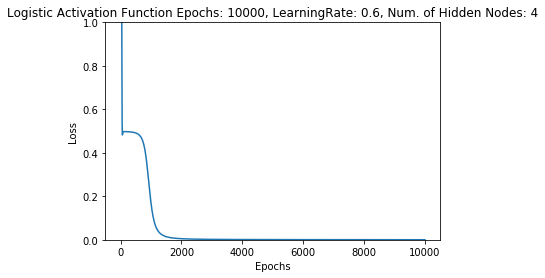

Weights:
Input to Hidden Layer: [[ -2.40400411  12.60817337  -1.42897453  21.4595374 ]
 [  7.1647845  -15.890272    -1.16658064  -8.01260252]
 [ 18.84119051   2.17317557   2.46783656 -21.70322739]]
Hidden Layer to Output: [[ -9.9682846 ]
 [-12.36204616]
 [ 18.06911532]
 [ 30.11870201]]


In [125]:
plt.plot(np.arange(1,epoch),cost_error_array)
plt.ylim(0,1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(str('Logistic Activation Function ') + str('Epochs: ' + str(epoch) + ', LearningRate: '+str(alpha) +', Num. of Hidden Nodes: '+str(hidden_layer_nodes)))
plt.show()
print("Weights:")
print("Input to Hidden Layer: " + str(w01))
print("Hidden Layer to Output: " + str(w12))

##### TanH Activation Function

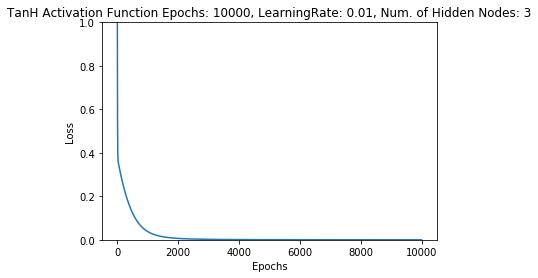

Weights:
Input to Hidden Layer: [[ 1.67764718  1.5716218   1.28573173]
 [-0.92999539  1.02926218  1.77276282]
 [-1.55677611 -1.98779305 -0.51223542]]
Hidden Layer to Output: [[ 1.50613289]
 [-2.65492315]
 [ 2.4925882 ]]


In [142]:
plt.plot(np.arange(1,epoch),cost_error_array)
plt.ylim(0,1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(str('TanH Activation Function ') + str('Epochs: ' + str(epoch) + ', LearningRate: '+str(alpha) +', Num. of Hidden Nodes: '+str(hidden_layer_nodes)))
plt.show()
print("Weights:")
print("Input to Hidden Layer: " + str(w01))
print("Hidden Layer to Output: " + str(w12))

##### A new variation - PiTanH Activation Function
Seems to converge faster than TanH

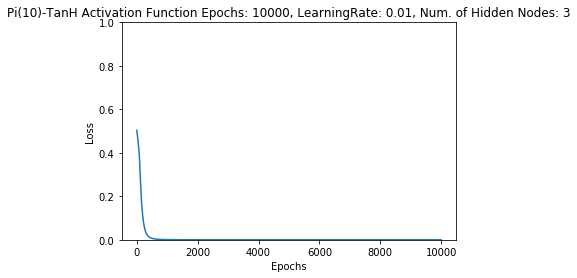

Weights:
Input to Hidden Layer: [[ 2.19120212  1.85918411 -0.52944586]
 [ 2.05319813  1.96278029  0.08314931]
 [-0.87496555 -2.88848914 -0.77393529]]
Hidden Layer to Output: [[ 2.76747167]
 [-2.61721229]
 [ 1.00492093]]


In [287]:
plt.plot(np.arange(1,epoch),cost_error_array)
plt.ylim(0,1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(str('Pi(10)-TanH Activation Function ') + str('Epochs: ' + str(epoch) + ', LearningRate: '+str(alpha) +', Num. of Hidden Nodes: '+str(hidden_layer_nodes)))
plt.show()
print("Weights:")
print("Input to Hidden Layer: " + str(w01))
print("Hidden Layer to Output: " + str(w12))

##### Different precision of Pi - 15,20

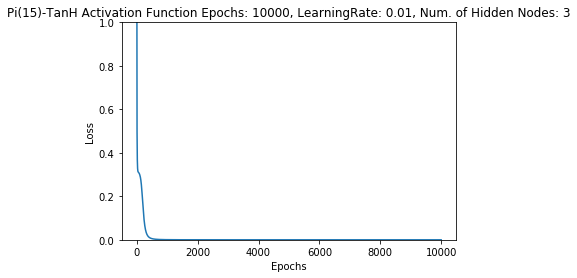

Weights:
Input to Hidden Layer: [[ 2.18371576 -1.59596752  1.68379115]
 [ 1.81117625 -1.92086515 -0.66737181]
 [-0.76789957  2.69921816  0.85990951]]
Hidden Layer to Output: [[ 2.88865253]
 [ 2.67529917]
 [-1.12819533]]


In [294]:
plt.plot(np.arange(1,epoch),cost_error_array)
plt.ylim(0,1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(str('Pi(15)-TanH Activation Function ') + str('Epochs: ' + str(epoch) + ', LearningRate: '+str(alpha) +', Num. of Hidden Nodes: '+str(hidden_layer_nodes)))
plt.show()
print("Weights:")
print("Input to Hidden Layer: " + str(w01))
print("Hidden Layer to Output: " + str(w12))

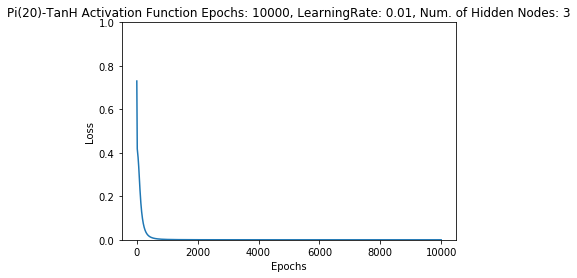

Weights:
Input to Hidden Layer: [[-0.87094723  1.6789499  -3.3883634 ]
 [ 1.96292031  2.74692745 -0.07507091]
 [ 0.14162375 -0.4155923   2.15906284]]
Hidden Layer to Output: [[-2.65075336]
 [ 3.94617765]
 [ 1.9772921 ]]


In [299]:
plt.plot(np.arange(1,epoch),cost_error_array)
plt.ylim(0,1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(str('Pi(20)-TanH Activation Function ') + str('Epochs: ' + str(epoch) + ', LearningRate: '+str(alpha) +', Num. of Hidden Nodes: '+str(hidden_layer_nodes)))
plt.show()
print("Weights:")
print("Input to Hidden Layer: " + str(w01))
print("Hidden Layer to Output: " + str(w12))

##### A new variation - GoldenRatio TanH Activation Function

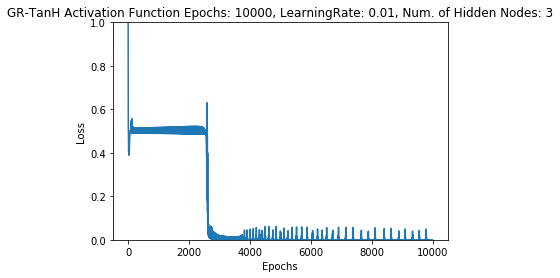

Weights:
Input to Hidden Layer: [[ -23.26545125   -5.81570968 -266.37533438]
 [  23.75617371    6.09667022  106.20093049]
 [  -2.3720925     1.68440696 -151.05244055]]
Hidden Layer to Output: [[ 1.86255923]
 [-1.8505437 ]
 [-3.5579354 ]]


In [268]:
plt.plot(np.arange(1,epoch),cost_error_array)
plt.ylim(0,1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(str('GR-TanH Activation Function ') + str('Epochs: ' + str(epoch) + ', LearningRate: '+str(alpha) +', Num. of Hidden Nodes: '+str(hidden_layer_nodes)))
plt.show()
print("Weights:")
print("Input to Hidden Layer: " + str(w01))
print("Hidden Layer to Output: " + str(w12))

##### ReLU Activation Function
Not suitable for single hidden layer

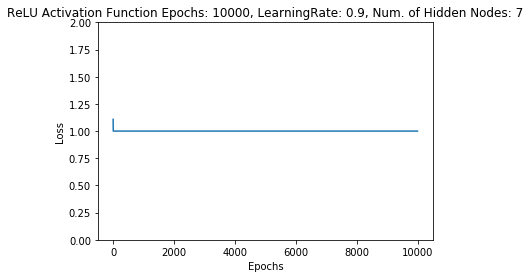

Weights:
Input to Hidden Layer: [[ 0.5386498  -1.42191689 -0.22284587  0.47645299 -0.75142151 -0.82326381
  -0.56456466]
 [ 0.37345353 -0.50204205 -0.49645332 -0.0471798  -2.08676522  0.10948302
  -1.68944228]
 [-0.45779912 -0.81653783  0.44176758 -0.43538725  0.63488181 -0.38218444
  -2.1925688 ]]
Hidden Layer to Output: [[-0.78177702]
 [ 0.26736151]
 [-0.0117439 ]
 [-0.91807493]
 [-1.00025615]
 [-0.37690269]
 [ 1.83228858]]


In [272]:
plt.plot(np.arange(1,epoch),cost_error_array)
plt.ylim(0,2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(str('ReLU Activation Function ') + str('Epochs: ' + str(epoch) + ', LearningRate: '+str(alpha) +', Num. of Hidden Nodes: '+str(hidden_layer_nodes)))
plt.show()
print("Weights:")
print("Input to Hidden Layer: " + str(w01))
print("Hidden Layer to Output: " + str(w12))